In [1]:
from __future__ import print_function
from __future__ import division

import os
import math
import matplotlib.pyplot as plt

import numpy as np
from astropy.io import fits
from astropy.table import Table
from scipy.stats import binned_statistic, scoreatpercentile
import pickle
from scipy.optimize import minimize
import time
from voronoi_2d_binning import voronoi_2d_binning
from sklearn.neighbors import NearestNeighbors
import pickle
import imp # reload modules if necessary

import sys
sys.path.append('../astro_codes/')

% matplotlib inline
import matplotlib as mpl
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

In [2]:
import dictionaries
import params

data = Table.read(params.data_file)

os.mkdir('output_files/') if os.path.isdir('output_files/') is False else None

question_dictionary = dictionaries.questions
function_dictionary = dictionaries.function_dictionary

data_subset = data[:2000]

In [3]:
import debias
import imp
imp.reload(debias)

questions = [q for q in question_dictionary.keys()]

for q in questions:
    answers = question_dictionary[q]['answers']
    for a in answers:
        print('---------------------------------------------')
        print('Q: {}'.format(q))
        print('A: {}'.format(a))
        print('---------------------------------------------')
        data = debias.debias(data,question=q,answer=a,verbose=False)

---------------------------------------------
Q: shape
A: smooth
---------------------------------------------
Primary question, so all 2000 galaxies used.

/home/ppxrh/Github_repos/Debiasing/fit.py:98: RuntimeWarning: invalid value encountered in log10
  term = constant*np.log10(var)
/home/ppxrh/anaconda3/lib/python3.4/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/ppxrh/Github_repos/Debiasing/fit.py:239: RuntimeWarning: invalid value encountered in less_equal
  p[p <= f.min_] = f.min_



Bin-accretion...
17  initial bins.
Reassign bad bins...
9  good bins.
Modified Lloyd algorithm...
3  iterations.
Unbinned pixels:  0  /  230
Fractional S/N scatter (%): 13.2360185498
---------------------------------------------
Q: shape
A: features
---------------------------------------------
Primary question, so all 2000 galaxies used.
Bin-accretion...
17  initial bins.
Reassign bad bins...
9  good bins.
Modified Lloyd algorithm...
3  iterations.
Unbinned pixels:  0  /  230
Fractional S/N scatter (%): 13.2360185498
---------------------------------------------
Q: shape
A: star_or_artifact
---------------------------------------------
Primary question, so all 2000 galaxies used.
Bin-accretion...
17  initial bins.
Reassign bad bins...
9  good bins.
Modified Lloyd algorithm...
3  iterations.
Unbinned pixels:  0  /  230
Fractional S/N scatter (%): 13.2360185498
---------------------------------------------
Q: disk
A: yes
---------------------------------------------
967/2000 galaxies w

/home/ppxrh/Github_repos/Debiasing/fit.py:240: RuntimeWarning: invalid value encountered in greater_equal
  p[p >= f.max_] = f.max_
/home/ppxrh/Github_repos/Debiasing/dictionaries.py:32: RuntimeWarning: invalid value encountered in greater
  ok = k > 0


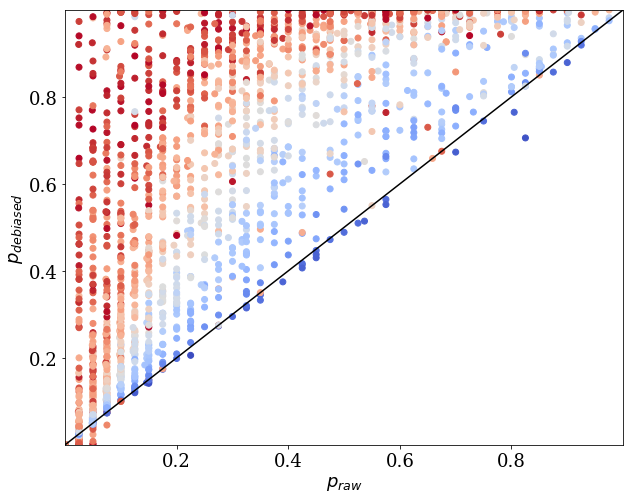

In [5]:
colorz = data_subset['Z_TONRY']

fv = data_subset['shape_features_fraction']
fv_debiased = data_subset['shape_features_debiased']

plt.scatter(fv,fv_debiased,c=colorz,cmap=plt.cm.coolwarm)
_ = plt.plot([0,1],[0,1],'k-')

_ = plt.xlabel('$p_{raw}$')
_ = plt.ylabel('$p_{debiased}$')
_ = plt.axis((0,1,0,1))